<a href="https://colab.research.google.com/github/TurkuNLP/ATP_kurssi/blob/master/ATP_2025_Notebook_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Processing language data**

Analyzing running text has some aspects that need special attention. We will go through the most important ones.

### **Tokenization**

**Tokenization** means splitting a larger text into tokens, which usually means words. It is very useful for counting word frequencies (what we have already done) and a necessary step for machine learning to be able to process data.

There are different ways to tokenize depending on the structure of the language and also what is needed:
* Tokenization into words. The most common case.
* Tokenization into characters. Good for languages that lack clear word boundaries.
* Tokenization info subwords. This method breaks text into units that might be larger than a single character but smaller than a full word. E.g. 'Chatbots' --> 'Chat' and 'bots'. Useful for languages that form meaning by combining smaller units or when dealing with out-of-vocabulary words in NLP tasks.

Tokenization usually splits multi word units into separate words, such as in the following sentence:

'Oh really!! You have studied at the University of Turku but live in New York?!'
* Multi word units: 'New York', 'University of Turku'
* After tokenization: 'New', 'York', 'University', 'of', 'Turku'

Automatic tokenization methods (e.g. Python's Trankit) usually consider all punctuation marks as individual words: "Oh really!?" --> 'Oh', 'really', '!', '?'

Manual tokenization (what we do with Bash) only splits words based on whitespace: 'Oh really??' --> 'Oh', 'really??' But as you know, you can remove punctuation in Bash with regex.


### **Inflection**

**Inflection** is inherent to language, and refers to the different forms of the same word:

* EN: 'is', 'are', 'was', 'were' --> to be
* FI: 'yö', 'yöksi', 'öisin' --> a night

These inflectional forms are not recognized as forms of the same word by machine learning, and even a simple task of counting word frequencies does not give good results without taking inflection into account. **Lemmatization** (i.e. extracting the base form of a word) removes inflection, but this is a complex task and cannot be done with Bash alone.


### **Part-of-speech (POS) and syntax**

**Part-of-speech** and **syntactic information** can provide metadata on the kinds of words included in the dataset and their roles.

**Part-of-speech classes**:

* Denotes the **meaning** and **function** of the word
* **Adjectives** describe, **verbs** denote action, **nouns** refer to things, etc.
* Distinction between _function words_ and _content words_
  * **Function words** typically grammatical words, such as conjunctions, auxiliaries, pronouns
  * **Content words** typically verbs and nouns reflecting the topical content of the text
  * **BUT** this is not always so simple...

**Syntax classes**:

* **Roles** the words play in a sentence
  * _subjects_ perform the action - who does?
  * _objects_ describe the target - to whom or what is the action targeted?
  * _modifiers_ modify or provide more information about, e.g., a noun. What kind of a thing?
* **Relations** between words
  * The actor of the verb - subject
  * The object of the action - object

###**So what..?**

What we often want as the end result is the text as single words (tokenization) without inflection (lemmatization) but no punctuation marks and perhaps even no capital letters. This makes it easy to get e.g. word frequencies that are not affected by inflection.

'Oh really. Oh really? Oh really?? Yes really :)'
* --> 'oh', 'really', 'oh', really', 'oh', 'really', 'yes', 'really'

By this means we can get the 'actual' frequencies of a word; e.g. in the example above we get 4 _really_ instead of 4 different _really_.

As for the POS tags, they provide us with information about the POS classes (Noun, Adj, Verb, Prep, ...) the words belong to, and enable analyses focusing on one part-of-speech, for instance. As an example, with the help of POS tags we can make frequency lists of adjectives only. Syntactic information, in turn, is useful if we want to focus on the relation between the words or the inflectional forms of a word, for instance, like the use of passives.

And here, **parsers** come to our help.

## Dependency parsing as a tool for preprocessing and normalizing language data

Dependency parsing outputting **syntax analyzed** and **lemmatized data** provides solutions to many challenges related to processing language data. The parser is a **pipeline** consisting of a number of steps.

Parsing provides us with

### POS
  * 17 values
  * https://universaldependencies.org/u/pos/index.html

### Morphology
  * E.g., Case=Nom or Number=Sing
  * Cases, infinitives, passive/active, etc.
  * Finnish has 80+ unique features
  * https://universaldependencies.org/u/feat/index.html

### Lemmatisation
  * Canonical or base form of the word, the one typically found in dictionaries

### Dependency syntax

* Typed dependency relations between words
* Basic dependency representation forms a tree
  * Exactly one word is the head of the sentence
  * All other words are dependent on another word in the sentence
* Dependency relations primarily between content words
* Function words attach as direct dependents of the most closely related content word
* 37 universal relations + language-specific subtypes
* https://universaldependencies.org/u/dep/index.html


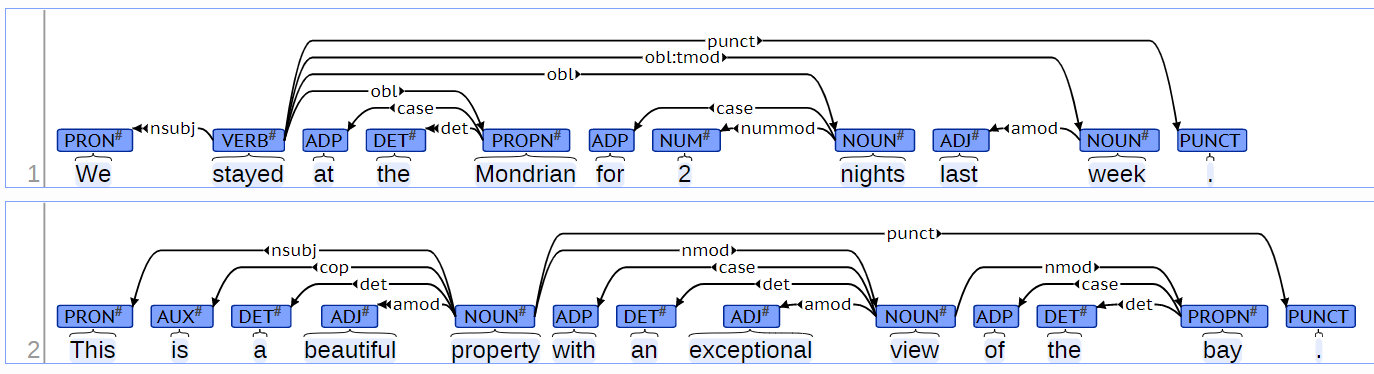

## From treebanks to parsers

_Datasets_ consisting of manually syntax-annotated sentences are called **treebanks**.
_Computer programs_ trained on treebanks to generate syntax annotations automatically are called **syntax parsers**.


## Universal Dependencies (UD)

* Open community effort to create **cross-linguistically consistent** treebank annotation for many languages
* Used as basis for parsers
* Main effort in dependency-based syntax annotation
* Guidelines for:
  * Segmentation
  * Morphology
  * Lemmatization
  * Syntax
* Data in UD (as of version 2.8 release from May 2021)
  * 202 treebanks
  * 114 languages
  * 24 language families
  * 450+ contributors
  *4 treebanks for Finnish (3 from Turku, 1 from Helsinki, this notebook refers to the Turku data)
https://universaldependencies.org/

* Motivation of UD
  * Increasing interest in multilingual NLP
  * Studies involving several languages
  * Multilingual evaluation
  * Cross-lingual learning - learn from English data, adapt the knowledge for Finnish data
  * All these studies rely on annotated data
  * Traditionally annotation schemes differ between corpora annotated for the same task
  * Design principles of UD

### CoNLL-U file format for reading syntax annotations

Parser output is a CoNNL-U file which includes lots of meta data and information. Here are some indications how to read a CoNNL-U file:

* Sentence/document metadata: lines starting with "#"
* Empty line: sentence boundary
* **Each numbered line is a separate token**, columns include different annotations for the token
* **Columns**: ID, FORM, LEMMA, UPOS, XPOS, FEAT, HEAD, DEPREL, DEPS, MISC
  * ID: word index
  * FORM: original word form as appeared in the text
  * LEMMA: base form
  * UPOS: universal part-of-speech tag (17 values)
  * XPOS: language-specific part-of-speech tag (different in each corpus)
  * FEAT: list of morphological features
  * HEAD: governor in the dependency tree (id), or zero (root token)
  * DEPREL: dependency relation type
  * DEPS: Enhanced dependency graph
  * MISC: Any other annotation, especially original spacing

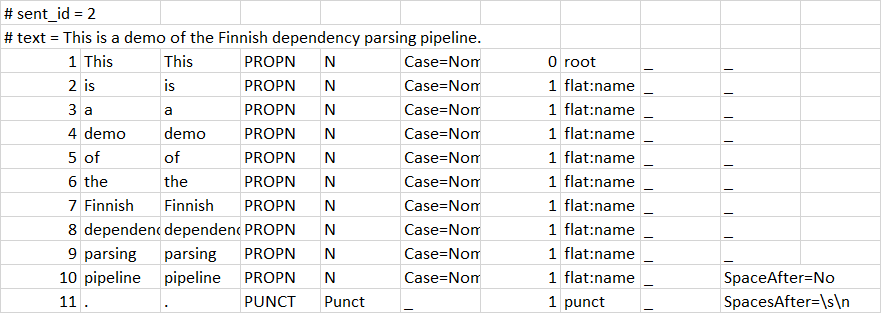

## Processing Conllu format

Processing a CoNNL-U file

* `cut` command is useful for Conllu as it targets **specific columns**

  `cat file.conllu | cut -f 2` # focuses on the second column (WORD)

  `cat file.conllu | cut -f 3` # focuses on the third column (LEMMA)

* Conllu format also allows to easily count sentences by counting just the number of lines starting with 1

  `cat file.conllu | egrep "^1[[:space:]]"` # the space is needed to not to match 10

##Familiarizing ourselves with the Conllu format
Let's try with the UD English Web Treebank!

1. First, what does the data look like? What can we tell about the format?

2. Then, basic stats: the number of

  a) documents
  
  b) words
  
  c) sentences

3. Which are the most frequent words?

4. Which are the most frequent lemmas? How can we count those?

In [ ]:
#get the data

! git clone https://github.com/UniversalDependencies/UD_English-EWT.git

In [ ]:
#check that we got the folder

!ls

In [ ]:
#go to the folder
#check what's in it

%cd UD_English-EWT/
! ls

In [ ]:
#let's focus on all the conllu files in the folder

#with the asterix * we get all the files ending with conllu

! cat *conllu | head -50 # lots of metadata!

#1. What does the data look like?
#how do new documents seem to start?
#how can we separate between sentences?

In [ ]:
# 2.a) How many documents?

! cat *conllu | egrep "^# newdoc" | head

In [ ]:
! cat *conllu | egrep "^# newdoc" | wc -l

In [ ]:
# 2.b) How many words?

# line start, any number 1 or more times, space
# "^[0-9]+[[:space:]]"

! cat *conllu | egrep "^[0-9]+[[:space:]]" | head -50 # this looks ok

#actually, this also includes punctuation, for instance, but we don't care about it at the moment

In [ ]:
! cat *conllu | egrep "^[0-9]+[[:space:]]" | wc -l

In [ ]:
# 2.c) How many sentences

#we can either grep the meta data lines starting with # sent_id

! cat *conllu | egrep "^# sent_id"  | head
! echo "-----"
! cat *conllu | egrep "^# sent_id"  | wc -l

In [ ]:
# 2.c) How many sentences

#or the lines that start with 1 (N.B. the [[:space:]] after 1 to exclude all other numbers starting with 1, like 10, 15, 114, etc.)

! cat *conllu | egrep "^1[[:space:]]"  | head
! echo "-----"
! cat *conllu | egrep "^1[[:space:]]"  | wc -l

In [ ]:
# 3. The most frequent words

! cat *conllu | egrep "^[0-9]+[[:space:]]"  | head -50 # focus on running words

# line start, any number, space
# "^[0-9][[:space:]]"

#! cat *conllu | egrep "^[0-9][[:space:]]"  | head -50 # this greps only lines that start with a number between 0 and 9,
#so no lines starting with a number above 9 (like 10, 25 or 60) are included

In [ ]:
#To get the most frequent running words, we need to create a frequency list of the words in the second column

#first, grep the lines that include no meta data
!echo 'Lines with the tokens'
!echo '---'
! cat *conllu | egrep "^[0-9]+[[:space:]]" | head -30
!echo '---'
#then, cut the column with the running words (i.e. as used in text)
!echo 'Column 2 with the running words'
!echo '---'
! cat *conllu | egrep "^[0-9]+[[:space:]]" | cut -f 2 | head
!echo ''---
#finally, create a frequency list
!echo 'Frequency list'
!echo '---'
! cat *conllu | egrep "^[0-9]+[[:space:]]" | cut -f 2 | sort | uniq -c | sort -rn | head -20
!echo '---'
#if we want to normalize the data (change all characters to lower case), we can use tr
!echo 'Normalized'
!echo '---'
! cat *conllu | egrep "^[0-9]+[[:space:]]" | cut -f 2 | tr '[:upper:]' '[:lower:]' | sort | uniq -c | sort -rn | head -20

# the most frequent words seem to be similar as usual

##More practice

Now, it's your turn.

4. Count the most frequent **lemmas**.

5. Count the most frequent **POS tags**.

6. How could you make a frequency list **without punctuation and numbering**?

In [ ]:
#4. Which are the most frequent lemmas?

In [ ]:
#5. Which are the most frequent POS tags?

In [ ]:
#6. How could you get just words in the frequency lists?